In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import folium
import warnings
warnings.filterwarnings('ignore')

In [2]:
accidents = pd.read_csv('US_Accidents_Dec19.csv')

In [3]:
accidents.head().transpose()

,0,1,2,3,4
ID,A-1,A-2,A-3,A-4,A-5
Source,MapQuest,MapQuest,MapQuest,MapQuest,MapQuest
TMC,201,201,201,201,201
Severity,3,2,2,3,2
Start_Time,2016-02-08 05:46:00,2016-02-08 06:07:59,2016-02-08 06:49:27,2016-02-08 07:23:34,2016-02-08 07:39:07
End_Time,2016-02-08 11:00:00,2016-02-08 06:37:59,2016-02-08 07:19:27,2016-02-08 07:53:34,2016-02-08 08:09:07
Start_Lat,39.8651,39.9281,39.0631,39.7478,39.6278
Start_Lng,-84.0587,-82.8312,-84.0326,-84.2056,-84.1884
End_Lat,NaN,NaN,NaN,NaN,NaN
End_Lng,NaN,NaN,NaN,NaN,NaN


#### Explanation of twilight phases
<img src="twiligh-phases.png">

In [4]:
accidents.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Lets explore our data!

#### Lets identify the categorical variables vs numeric variables

In [33]:
cols = accidents.columns
num_cols = list(accidents._get_numeric_data().columns)
cat_cols = list(set(cols) - set(num_cols))
# '--------Categorical Variables--------',cat_cols, '--------Numeric Variables--------' ,num_cols

#### Check missing values

##### Missing values in categorical variables

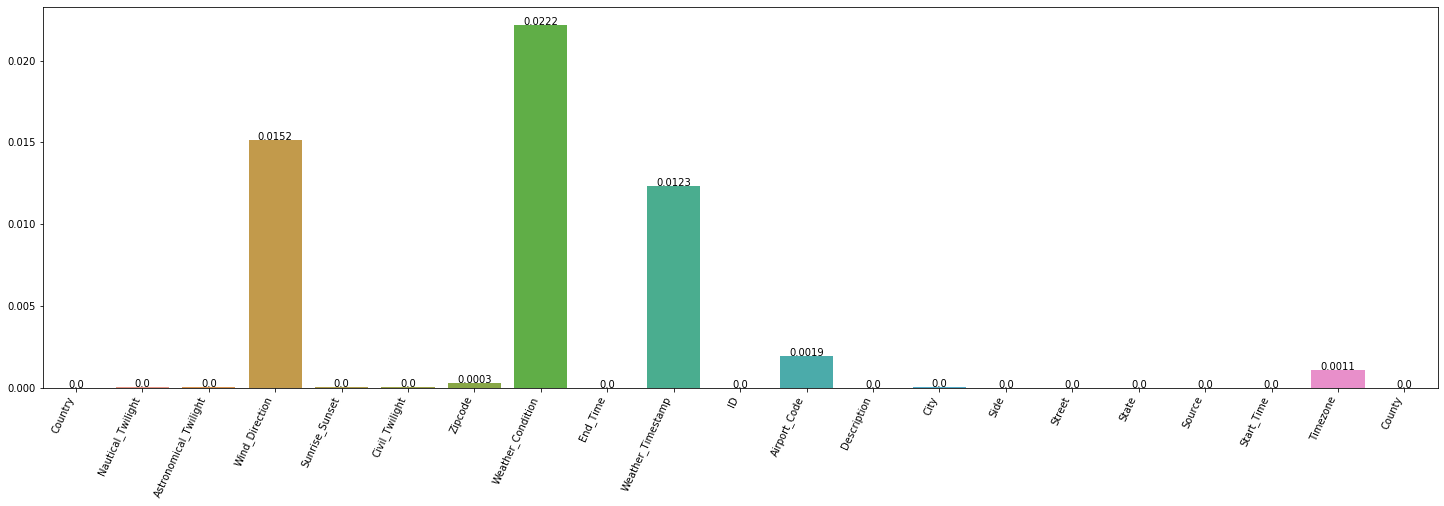

In [6]:
fig,ax = plt.subplots(figsize = (25,7))
x = accidents[cat_cols].isnull().sum().index
y = accidents[cat_cols].isnull().sum()
chart = sb.barplot(x,y/len(accidents),ax=ax)
length,_ = plt.xticks(rotation=65, horizontalalignment='right')
for name, value in zip(length,y):
    value = value/len(accidents)
    chart.text(name,value, round(value,4), color='black', ha="center")


##### Missing values in numeric variables

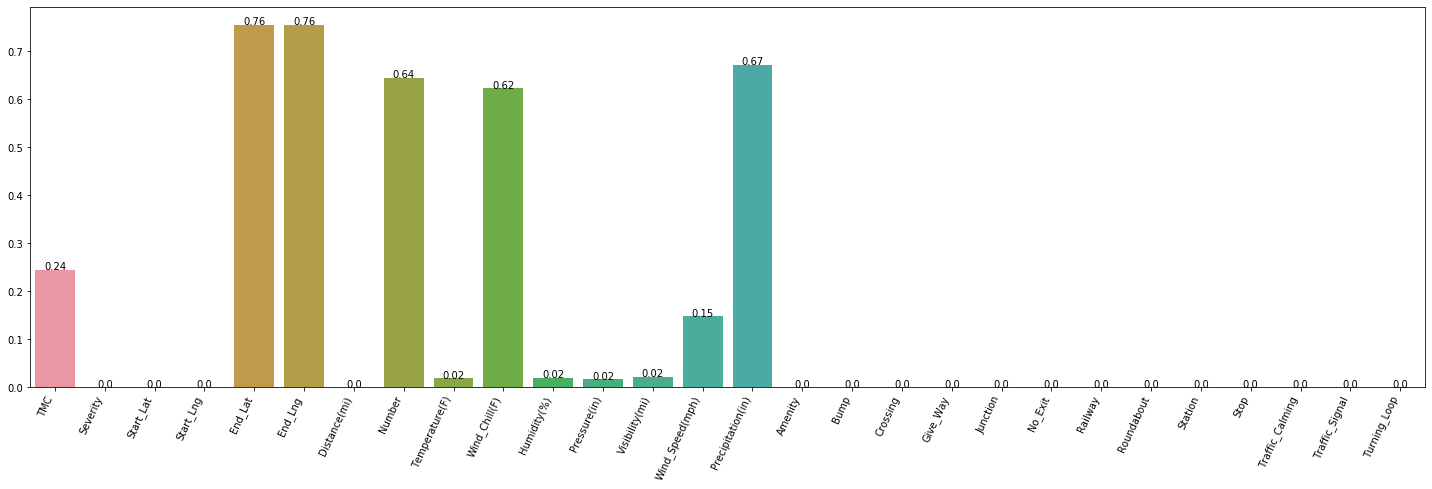

In [7]:
fig,ax = plt.subplots(figsize = (25,7))
x = accidents[num_cols].isnull().sum().index
y = accidents[num_cols].isnull().sum()
chart = sb.barplot(x,y/len(accidents),ax=ax)
length,_ = plt.xticks(rotation=65, horizontalalignment='right')
for name, value in zip(length,y):
    value = value/len(accidents)
    chart.text(name,value, round(value,2), color='black', ha="center")

#### From the above two graphs we can identify the variables with missing values. Now lets check the imbalance in the variables from highest to lowest.

In [8]:
missing = set(accidents.columns[accidents.isnull().any()])
indexes_cat = list(missing-set(num_cols))
indexes_num = list(missing-set(cat_cols))



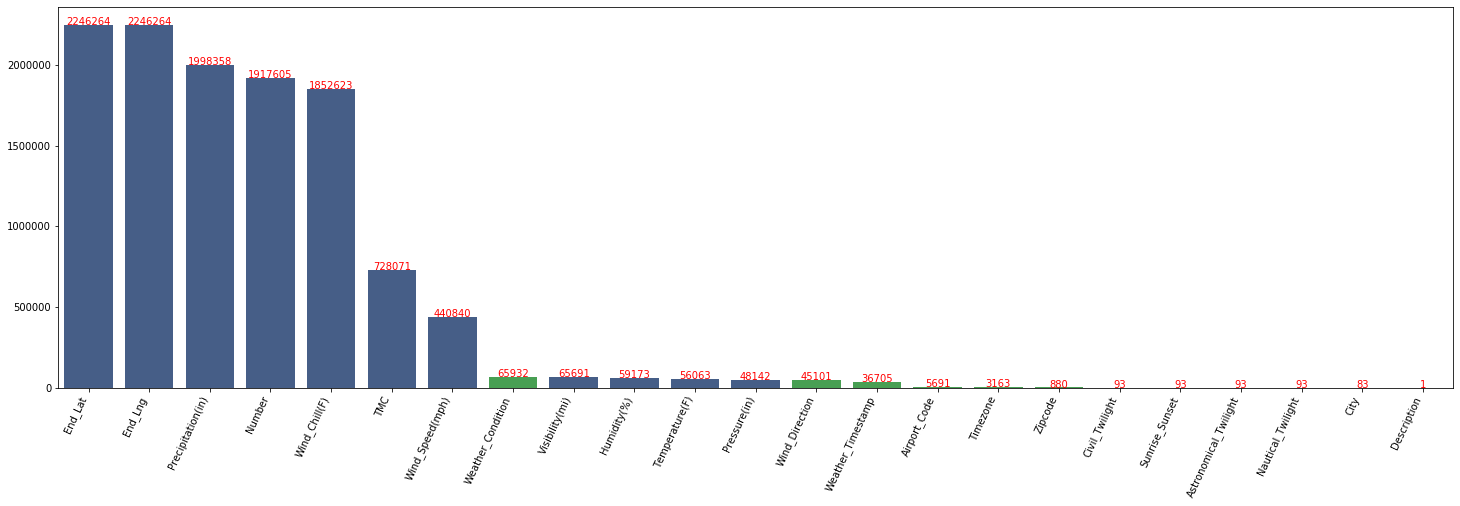

In [9]:
fig,ax = plt.subplots(figsize = (25,7))
colors = [0]*len(missing)
x = accidents[missing].isnull().sum().sort_values(ascending = False).index
for i,val in enumerate(x):
    if val in indexes_cat:
        colors[i] = sb.xkcd_rgb["medium green"]
    elif val in indexes_num:
        colors[i] = sb.xkcd_rgb["denim blue"]
y = accidents[missing].isnull().sum().sort_values(ascending = False)
chart = sb.barplot(x=x, y=y, palette = colors, ax=ax)
length,_ = plt.xticks(rotation=65, horizontalalignment='right')
# h, l = chart.get_legend_handles_labels()
# print (l)
# chart.legend([sb.xkcd_rgb["medium green"],sb.xkcd_rgb["denim blue"]], ['Categorical','Numeric'], title="Interested in politics")
for name, value in zip(length,y):
    chart.text(name,value, round(value,4), color='red', ha="center")    
    value = value/len(accidents)
#     chart.text(name,value, round(value,4), color='black', ha="center")


Lets see what values we can remove and which values we can impute

1. We can get rid of 'End_lng' and 'End_Lat' columns since we can get away with starting points of Latitudes and Longitudes.
2. 'City' ,'Zipcode', 'Timezone' can be easily filled since we have start lats and longs.
3. We can get rid of the 1 'description' missing value.
4. We can also remove 93 rows where 'Civil_Twilight', 'Sunrise_Sunset', 'Astronomical_Twilight' and 'Nautical_Twilight'

For the other variables we can plot co-relation matrix to understand the correlations in data variables

In [10]:
accidents = accidents.drop(columns=['End_Lat', 'End_Lng'])

In [11]:
accidents.dropna(subset=['Description','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],inplace = True)

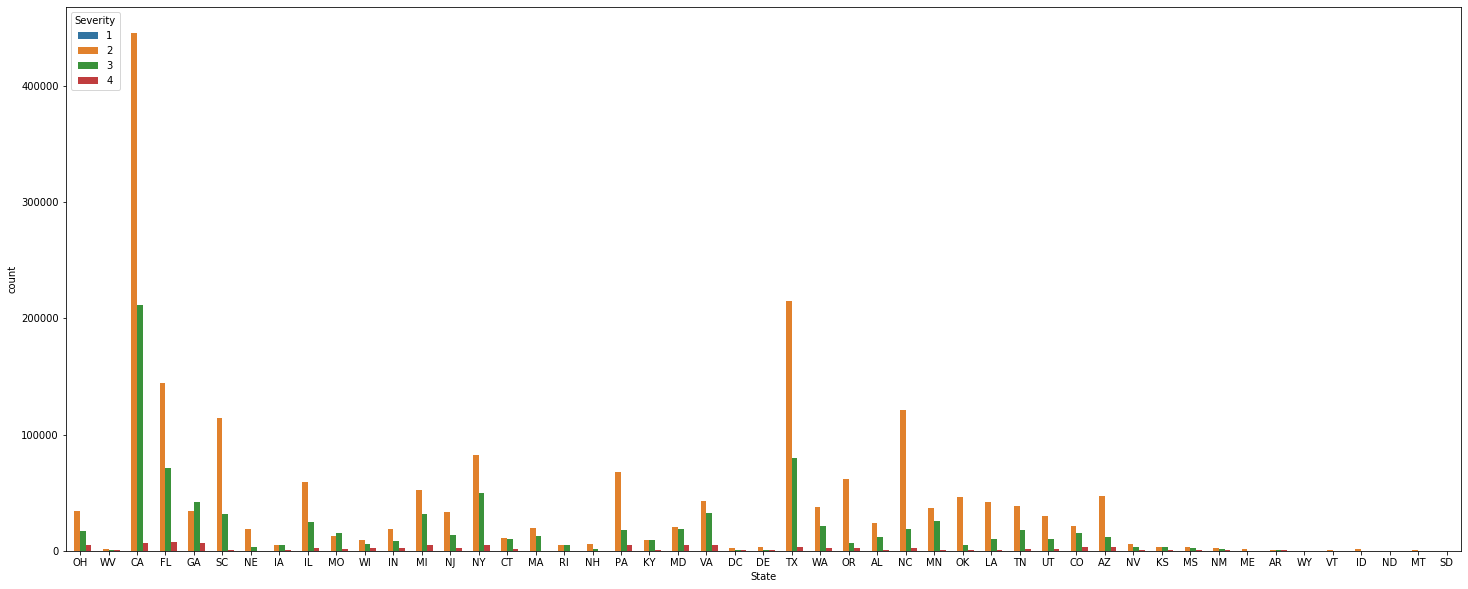

In [12]:
fig,ax = plt.subplots(figsize=(25,10))
sb.countplot(x="State", hue = 'Severity',
 data=accidents)

KeyboardInterrupt: 

In [14]:
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="us_accidents")

# zip_indexes = accidents[accidents['Zipcode'].isnull()].index.to_list()
# for index in zip_indexes:
#     print(accidents.iloc[index,:]['Start_Time'])
#     lat,long = accidents.iloc[index,:]['Start_Lat'],accidents.iloc[index,:]['Start_Lng']
#     print(lat,long)
#     location = geolocator.reverse(lat,long)
#     print((location.latitude, location.longitude))
        

# # (accidents.iloc[0,:])['Start_Lat','Start_Lng']


In [15]:
coordinates = pd.read_csv('uscities.csv')

#### Lets look at the causes of accidents in the state of California (since it has the highest accident occurence rate) and accordingly we can translate it to other states.

In [80]:
state = accidents[(accidents['State'] == 'CA')]# & (accidents['Severity'] == 4)]

#### Let's plot a heatmap to understand the the correlation between numeric variables

In [67]:
boolean_cols = list(state.dtypes.index[np.where((state.dtypes == bool) == True)] )
num_cols = list(set(num_cols)-set(boolean_cols))

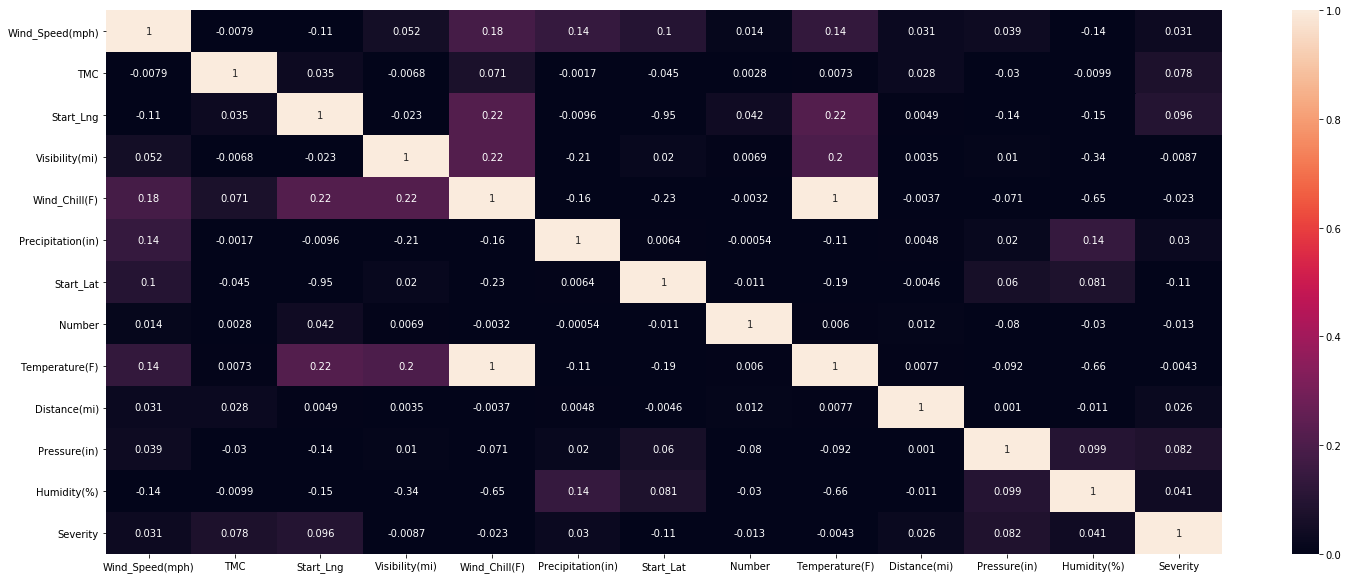

In [57]:
fig,ax = plt.subplots(figsize=(25,10))
correlation = state[num_cols].corr()
sb.heatmap(correlation,vmin=0,vmax=1,annot=True)

#### from the above plot we can figure out that there is very low correlation between Severity of an accident and other variables which primarily are weather condtions

#### Now, lets check on what dates the accidents occured and with what severity so that we can figure out if time is a reason for accidents.

In [96]:
pd.to_datetime(state.Start_Time, format='%Y-%m-%d %H:%M:%S')
pd.to_datetime(state.End_Time, format='%Y-%m-%d %H:%M:%S')
state['start_time'] = [d.time() for d in state['Start_Time']]
state['end_time'] = [d.time() for d in state['End_Time']]
state['start_date'] = [d.date() for d in state['Start_Time']]
state['end_date'] = [d.date() for d in state['End_Time']]
state['year'] = pd.DatetimeIndex(state['Start_Time']).year
state['month'] = pd.DatetimeIndex(state['Start_Time']).month
state['day'] = pd.DatetimeIndex(state['Start_Time']).day

#### Here we can see how accidents count trends according to day,month, year.

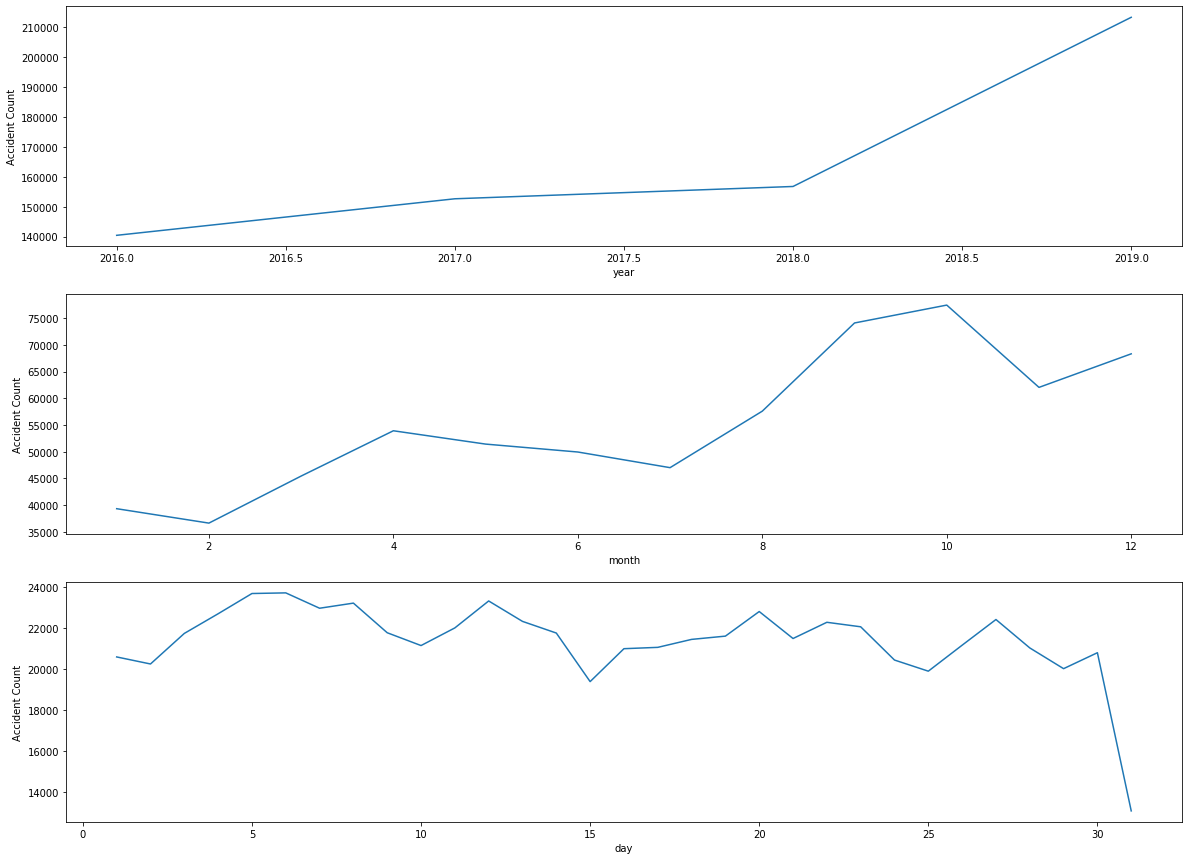

In [151]:
fig,ax = plt.subplots(3,1,figsize=(20,15))
plots = ['year','month','day']

for i,key in enumerate(plots):
    x = state[key].value_counts().index
    y = state[key].value_counts()
    ax[i] = sb.lineplot(x = x,y = y,ax = ax[i])
    ax[i].set(xlabel=key, ylabel='Accident Count')
    


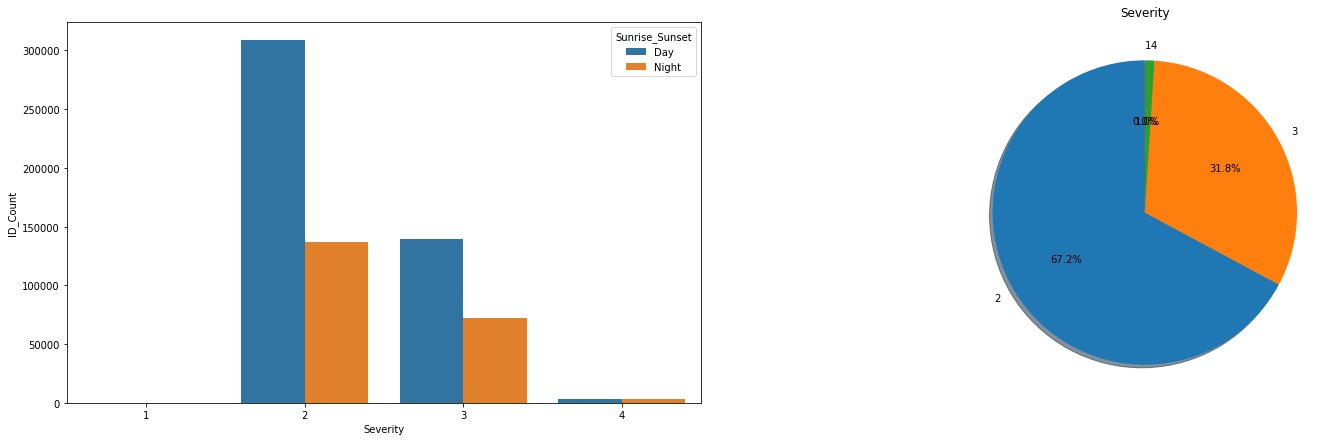

In [209]:
fig,ax = plt.subplots(1,2,figsize = (25,7)) 
df = state.groupby(['Severity','Sunrise_Sunset']).count().add_suffix('_Count').reset_index()
chart = sb.barplot(x = 'Severity',y = 'ID_Count',hue = 'Sunrise_Sunset', data = df,ax=ax[0])
ax[1].pie(state['Severity'].value_counts(), labels=state['Severity'].value_counts().index.tolist(), autopct='%1.1f%%',
                shadow=True, startangle=90)
ax[1].set_title('Severity')
plt.show() 

In [206]:
type(state.groupby(['Severity','Sunrise_Sunset']).size())

pandas.core.series.Series

In [157]:
tips = sb.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [77]:
state.dtypes

ID                               object
Source                           object
TMC                             float64
Severity                          int64
Start_Time                       object
End_Time                         object
Start_Lat                       float64
Start_Lng                       float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64


In [17]:
# m = folium.Map(
#     location=coordinates.iloc[45,1:],
#     tiles='cartodbpositron',
#     zoom_start=8,
# )
# state[['Start_Lat','Start_Lng']].apply(lambda row:folium.Marker(location=[row["Start_Lat"], row["Start_Lng"]]).add_to(m), axis=1)
# m

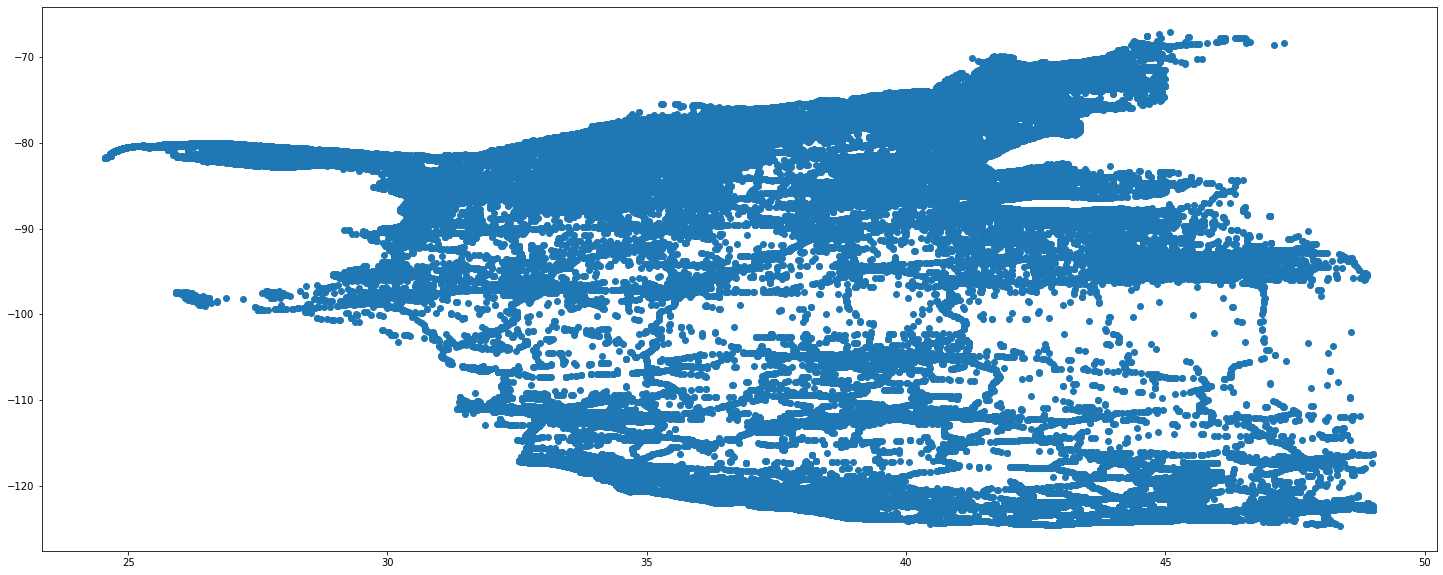

In [28]:
fig,ax = plt.subplots(figsize=(25,10))
ax.scatter(x = accidents['Start_Lat'],y = accidents['Start_Lng'])

In [64]:
a = ['1']
b = ['2']

In [65]:
a+b

['1', '2']